#1. Perkenalan

> Nama : Stefanus Bayu Waskito

> Kelas : FTDS 018 Remote

> Latarbelakang : 

> Objective : Melakukan prediksi terhadap customer yang berhenti menggunakan produk (churn) yang dijual oleh perusahaan.



#2. Import Libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle

# 3. Import Data

In [51]:
data = pd.read_csv('https://raw.githubusercontent.com/H8-Assignments-Bay/p2---ftds-018-rmt---m1-stefanusbayuw/main/churn.csv?token=GHSAT0AAAAAAB56GBYFSP5GMFZ3GUG6NKCOZBGQZLA')

In [52]:
data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [53]:
data.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [54]:
data.shape

(37010, 22)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

#4. Expolratory Data Analysis

In [56]:
# Fitur counts
gender_counts = data['gender'].value_counts()
churn_counts = data['churn_risk_score'].value_counts()
member_counts = data['membership_category'].value_counts()

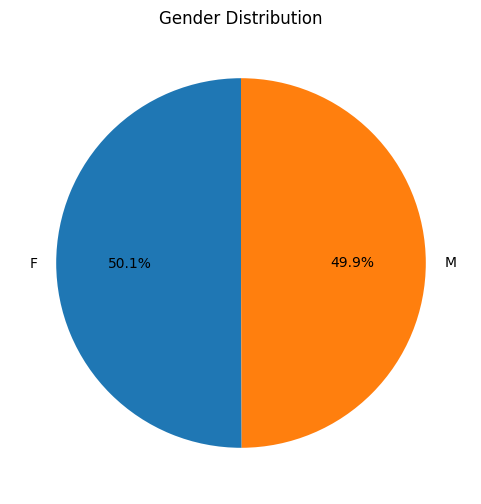

In [57]:
# Tampilkan pie chart fitur "gender"
plt.figure(figsize=(6,6))
plt.title("Gender Distribution")
plt.pie(x=gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

> Pada data yang dimiliki, terdapat 2 label pada fitur gender yaitu Female dan Male.

> Pengguna proudk kita yang memiliki jenis kelamin Female memiliki persentase sebesar 50.1% dan Male mamiliki persentase 49.9%

> Dari informasi menunjukkan bahwa distibusi gender antara Male dan Female pengguna produk kita dikatakan imbang ata balance.

In [58]:
data['gender'].value_counts()

F    18497
M    18454
Name: gender, dtype: int64

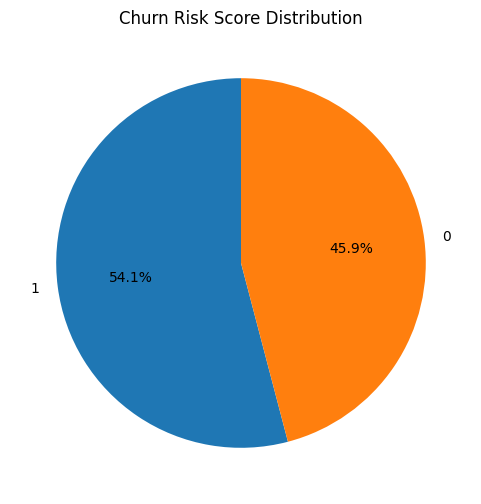

In [59]:
# Tampilkan pie chart fitur "churn_risk_score"
plt.figure(figsize=(6,6))
plt.title("Churn Risk Score Distribution")
plt.pie(x=churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

> Pada data yang dimiliki, terdapat 2 label pada fitur churn_risk_score yaitu 0 dan 1. Label 0 merupakan not churn dan label 1 adalah churn

> Label not churn memiliki persentase sebesar 54.1% dan Label not churn mamiliki persentase 45.9%.

> Dapat diambil statement bahwa terdapat 45.9% pengguna berhenti menggunakan produk kita.

> Dari informasi menunjukkan bahwa distibusi churn_risk_score antara Label 0 dan Label 1 dikatakan imbang atau balance.

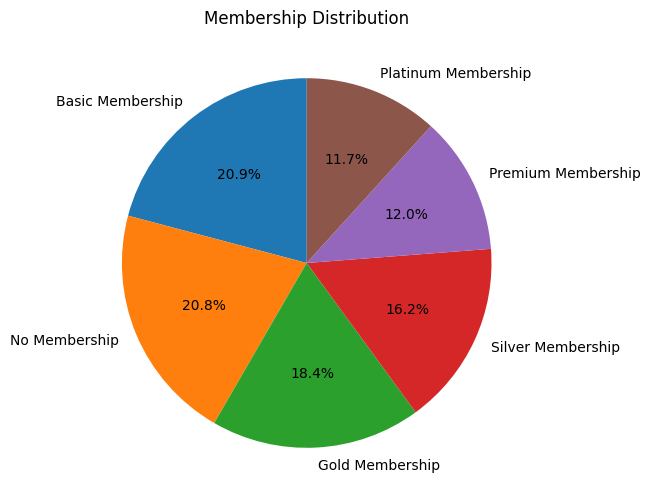

In [60]:
# Tampilkan pie chart fitur "membership_category"
plt.figure(figsize=(6,6))
plt.title("Membership Distribution")
plt.pie(x=member_counts.values, labels=member_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

In [61]:
# Hitung masing-masing label pada fitur "membership_category"

data['membership_category'].value_counts()

Basic Membership       7727
No Membership          7693
Gold Membership        6799
Silver Membership      5991
Premium Membership     4458
Platinum Membership    4342
Name: membership_category, dtype: int64

> Pada data yang dimiliki, terdapat 5 label pada fitur membership_category yaitu No Member, Basic Membership, Platinum Membership, Premium Membership, Silver Membership dan Gold Membership. Dengan distribusi sebagai berikut :


*   No Membership dengan total 7693 member atau 20.8%,
*   Basic Membership dengan total 7727 member atau 20.9%,
*   Platinum Memmersihp dengan total 4342 member atau 11.7%,
*   Premium Membership dengan total 4458 member atau 12.0%,
*   Silver Membership dengan total 5991 member atau 16.2% dan
*   Gold Membership dengan total 6799 member atau 18.4%.

<Axes: xlabel='age', ylabel='Count'>

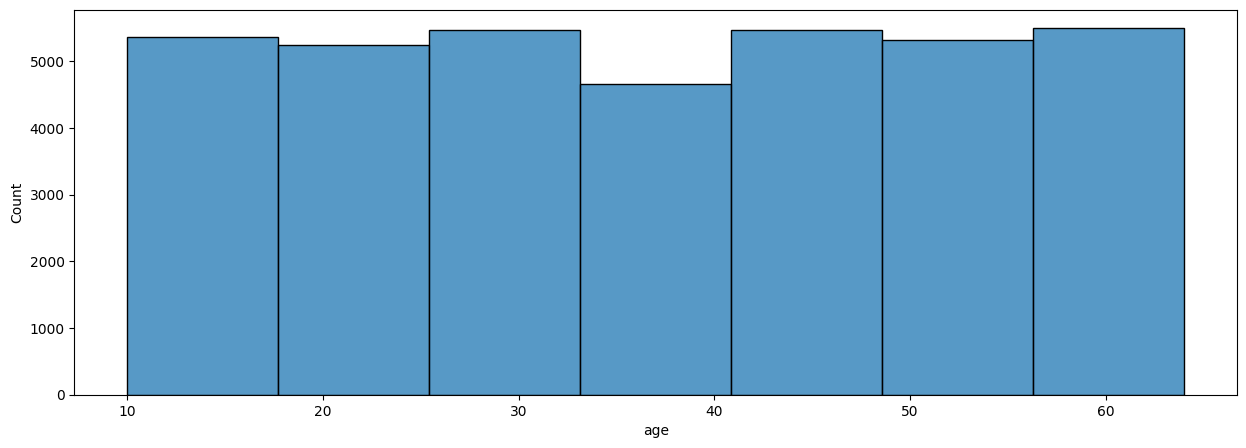

In [62]:
# Tampilkan histo chart fitur 'age'

plt.figure(figsize = (15,5))
sns.histplot(data['age'], bins=7)

In [63]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


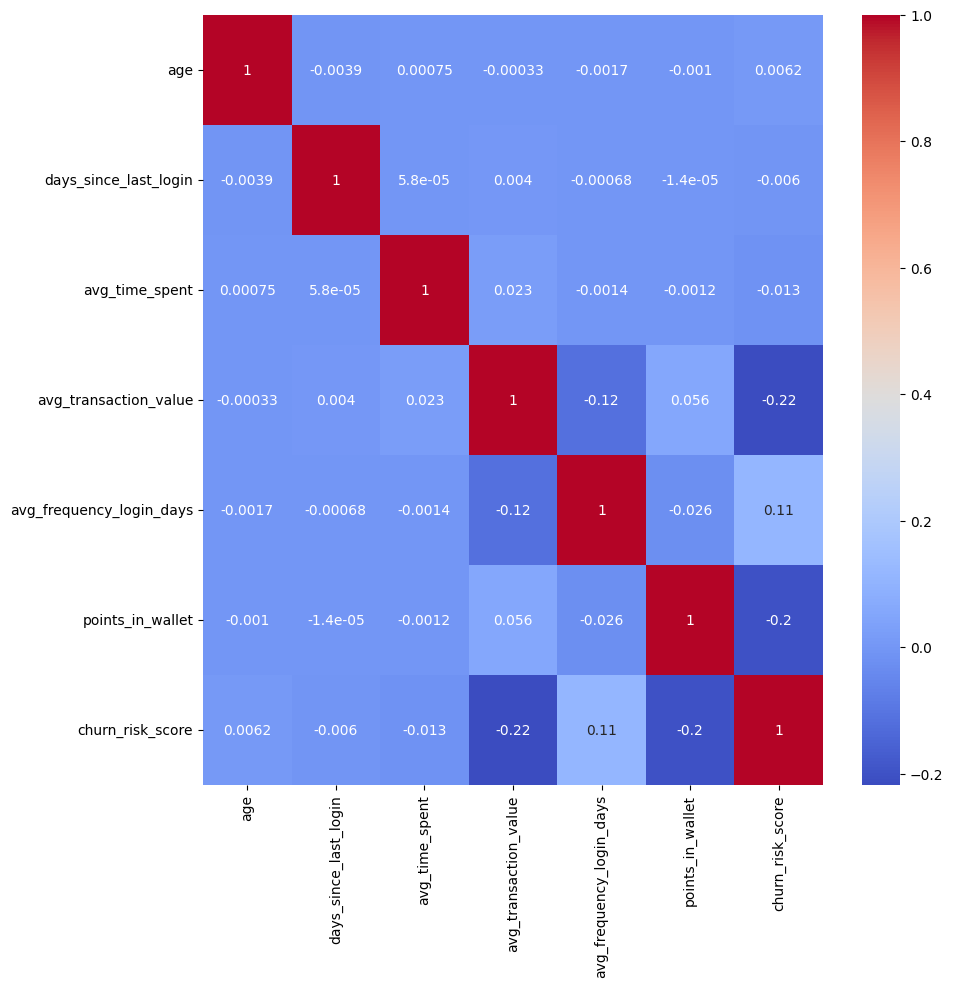

In [64]:
# Melihat korelasi antar kolom dengan pearson

heatmapPearson=data.corr(method="pearson")
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(heatmapPearson, annot=True, cmap="coolwarm",ax=ax)
plt.show()

> Pengecekan korelasi masing-masing fitur terhadap target yaitu 'churn_risk_score' menggunakan pearson correlation.

> Fitur 'avg_transaction_value' memiliki korelasi negatif dengan target, dapat disimpulkan bahwa pembeli yang memiliki rataan nilai transaksi yang rendah cenderung memiliki risiko untuk churn.

> Fitur 'avg_frequency_login_days' memiliki koreslasi positif dengan target dimana pembelii yang sering login cenderung tidak memiliki risiko untuk churn.

> Fitur 'points_in_wallet' memiliki korelasi negatif dengan target dimana pembeli yang memiliki sedikit poin di wallet cenderung memiliki risiko untuk churn.


#5. Feature Engineering

## 5.1. Split Data X dan y

In [65]:
# Splitting `X` and `y`

X = data.drop('churn_risk_score', axis=1)
y = data['churn_risk_score']

> Membagi data menjadi X sebagai fitur dan y sebagai target.

## 5.2. Split Train-Set, Val-Set, and Test-Set

In [66]:
# Split Train-Set, Val-Set, dan Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=33)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (23686, 21)
Val Size :  (5922, 21)
Test Size :  (7402, 21)


##5.3. Feature Selection

In [67]:
# Tampilkan X_train

X_train

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
20265,b42b1c3e20531e0b,32,F,NaN,Premium Membership,2015-05-26,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,19,242.13,49307.16,27.0,0.00,Yes,No,Yes,Solved in Follow-up,Poor Website
249,852b71dd8cca980c,21,M,Town,No Membership,2016-07-02,No,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,24,0.00,40762.48,12.0,661.48,Yes,No,Yes,Unsolved,No reason specified
34850,a0604396af29bf8c,37,F,Town,Platinum Membership,2017-03-07,No,Credit/Debit Card Offers,Both,Mobile_Data,...,4,462.93,25598.24,6.0,780.45,No,Yes,No,Not Applicable,Too many ads
25022,b7b9db15ee8639eb,30,F,Town,No Membership,2016-09-01,No,Without Offers,Desktop,Mobile_Data,...,-999,216.91,10470.31,22.0,674.87,No,Yes,No,Not Applicable,No reason specified
20579,a551efe27224f533,16,F,NaN,Platinum Membership,2017-08-26,No,Gift Vouchers/Coupons,NaN,Fiber_Optic,...,15,412.46,99121.05,2.0,716.62,Yes,Yes,Yes,Unsolved,Quality Customer Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,aee9d39f72f388dc,62,F,NaN,Premium Membership,2016-01-15,Yes,Credit/Debit Card Offers,NaN,Mobile_Data,...,6,588.78,31227.95,15.0,771.42,Yes,No,No,Not Applicable,Poor Product Quality
30317,ba6c4e4a8af1f86e,24,M,City,Premium Membership,2017-07-04,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,12,32.98,41171.35,0.0,766.05,Yes,No,Yes,Solved in Follow-up,Products always in Stock
17921,8e54112bef255bcd,19,M,City,Silver Membership,2015-06-04,Yes,Without Offers,NaN,Mobile_Data,...,12,37.01,5333.87,13.0,651.71,No,Yes,Yes,Unsolved,Poor Product Quality
12859,b2e7c0af3eddc74f,30,F,Village,Platinum Membership,2017-11-19,Yes,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,11,0.00,30464.51,23.0,739.03,Yes,No,No,Not Applicable,Poor Customer Service


In [68]:
# Drop Columns

X_train.drop(['user_id', 'region_category', 'joining_date', 'preferred_offer_types','joined_through_referral', 'medium_of_operation', 'internet_option', 'last_visit_time','days_since_last_login',  'past_complaint', 'complaint_status', ], axis=1, inplace=True)
X_val.drop(['user_id', 'region_category', 'joining_date', 'preferred_offer_types','joined_through_referral', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since_last_login',  'past_complaint', 'complaint_status', ], axis=1, inplace=True)
X_test.drop(['user_id', 'region_category', 'joining_date', 'preferred_offer_types','joined_through_referral', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since_last_login',  'past_complaint', 'complaint_status', ]  , axis=1, inplace=True)

In [69]:
X_train.shape

(23686, 10)

In [70]:
X_train

,age,gender,membership_category,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,feedback
20265,32,F,Premium Membership,242.13,49307.16,27.0,0.00,Yes,No,Poor Website
249,21,M,No Membership,0.00,40762.48,12.0,661.48,Yes,No,No reason specified
34850,37,F,Platinum Membership,462.93,25598.24,6.0,780.45,No,Yes,Too many ads
25022,30,F,No Membership,216.91,10470.31,22.0,674.87,No,Yes,No reason specified
20579,16,F,Platinum Membership,412.46,99121.05,2.0,716.62,Yes,Yes,Quality Customer Care
...,...,...,...,...,...,...,...,...,...,...
2093,62,F,Premium Membership,588.78,31227.95,15.0,771.42,Yes,No,Poor Product Quality
30317,24,M,Premium Membership,32.98,41171.35,0.0,766.05,Yes,No,Products always in Stock
17921,19,M,Silver Membership,37.01,5333.87,13.0,651.71,No,Yes,Poor Product Quality
12859,30,F,Platinum Membership,0.00,30464.51,23.0,739.03,Yes,No,Poor Customer Service


## 5.4.  Missing Value

In [71]:
# Cek Missing Values di X_train

X_train.isnull().sum()

age                              0
gender                          39
membership_category              0
avg_time_spent                   0
avg_transaction_value            0
avg_frequency_login_days         0
points_in_wallet                 0
used_special_discount            0
offer_application_preference     0
feedback                         0
dtype: int64

> Pengecekan Missing value pada data X_train, pada fitur gender terdapat missing value dan disaumsikan bahwa pada X_test dan X_val juga terdapat missing value.

In [72]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train['gender'] = imputer.fit_transform(X_train[['gender']])
X_test['gender'] = imputer.fit_transform(X_test[['gender']])
X_val['gender'] = imputer.fit_transform(X_val[['gender']])

> Imputasi missing value pada X_train, X_test dan X_val dengan menggunakan SimpleImputer dan missing value akan diimputasi dengan nilai yang paling sering muncul.

In [73]:
# Cek Missing Values di X_train

X_train.isnull().sum()

age                             0
gender                          0
membership_category             0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
feedback                        0
dtype: int64

In [74]:
# Cek Missing Values di X_test

X_test.isnull().sum()

age                             0
gender                          0
membership_category             0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
feedback                        0
dtype: int64

In [75]:
# Cek Missing Values di X_val

X_val.isnull().sum()

age                             0
gender                          0
membership_category             0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
feedback                        0
dtype: int64

> Setelah diimputasi dilakukan pengecekan pada X_train, X_test dan X_val, tidak ditemu missing value pada data yang akan digunakan.

##5.5 Scaling and Encoding

In [76]:
num_transformer = StandardScaler()
cat_transformer = OrdinalEncoder()

> Pendefinisian StandartScaller untuk scaling data numerik dan OrdinalEncoder untuk data kategotikal.

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23686 entries, 20265 to 32799
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           23686 non-null  int64  
 1   gender                        23686 non-null  object 
 2   membership_category           23686 non-null  object 
 3   avg_time_spent                23686 non-null  float64
 4   avg_transaction_value         23686 non-null  float64
 5   avg_frequency_login_days      23686 non-null  float64
 6   points_in_wallet              23686 non-null  float64
 7   used_special_discount         23686 non-null  object 
 8   offer_application_preference  23686 non-null  object 
 9   feedback                      23686 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.0+ MB


In [79]:
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, ['age', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days','points_in_wallet']),
                                               ('cat', cat_transformer, ['gender', 'membership_category', 'used_special_discount', 'offer_application_preference', 'feedback'])])

> Memisahkan fitur yang memiliki tipe data numerikal dan kategorikal dan dimasukkan pada variabel preprocessor.

In [80]:
X_train_handling = preprocessor.fit_transform(X_train)
X_test_handling = preprocessor.fit_transform(X_test)
X_val_handling = preprocessor.fit_transform(X_val)

> Melakukan trasnformasi pada data dengan fungsi preprocessor untuk scaling dan encoding. 

> Data X_train, X_test dan X_valyang telah dilakukan scaling dan encode disimpan pada variable X_train_handling, X_test_handling dan X_val_handling yang nantinya akan digunakan untuk training model.

>

## 5.6 Pipeline Tensorflow

In [82]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_handling,y_train)).batch(64).shuffle(128).repeat(3).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_handling,y_test)).batch(64)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_handling,y_val)).batch(64)
#train_pipe = function(train_pipe)

> Membuat tensor pipeline.

> Pada data Train atau train_pipe menggunakan data dari X_train_handling dengan membagi per batch dengan 64 data yang dilakukan shuffle menggunakan shuffle(128) dan diulang 3 kali menggunakan repeat(3).

> Pada data Test atau test_pipe menggumenggunakan data dari X_train_handling dengan membagi per batch dengan 64 data.

> Pada data Val atau val_pipe menggumenggunakan data dari X_train_handling dengan membagi per batch dengan 64 data.

In [83]:
X_train_handling.shape

(23686, 10)

# 6. Baseline Model

##6.1. Sequential API

###6.1.1. Model Definition

In [84]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(10, activation='relu', input_shape=(10,))) # Input Layer
model_sequential.add(Dense(8, activation='relu')) # Hidden Layer 1
model_sequential.add(Dense(8, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(8, activation='relu')) # Hidden Layer 3
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dense_34 (Dense)            (None, 8)                 88        
                                                                 
 dense_35 (Dense)            (None, 8)                 72        
                                                                 
 dense_36 (Dense)            (None, 8)                 72        
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


> Membuat model sekuensial dengan menggunakan 3 hidden layer yang semuanya menggunakan fungsi aktivasi relu dan menggunakan 8 hidden neuron. Pada Input layer menggunakan 10 hidden neuron karena menggunakan 10 fitur data yang mana juga menggunakan fungsi aktivasi relu. Pada output layer menggunakan fungsi aktivasi sigmoid.

> Model yang dibuat menggunakan loss function binary_crossentropy karena kali ini saya membuat model untuk klasifikasi biner atau target data dengan 2 kelas. optimizer yang digunakan adam dan metric evaluation  menggunakan accuracy.

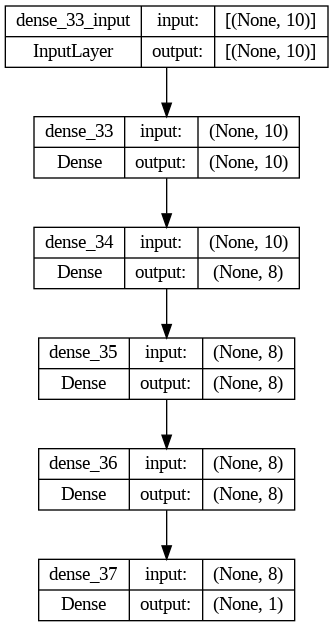

In [85]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

###6.1.2. Model Training

In [86]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe))

Epoch 1/50
1113/1113 [==============================] - 6s 4ms/step - loss: 0.5222 - accuracy: 0.7459 - val_loss: 0.4135 - val_accuracy: 0.8269
Epoch 2/50
1113/1113 [==============================] - 5s 5ms/step - loss: 0.3655 - accuracy: 0.8640 - val_loss: 0.3320 - val_accuracy: 0.8747
Epoch 3/50
1113/1113 [==============================] - 5s 5ms/step - loss: 0.3186 - accuracy: 0.8843 - val_loss: 0.3029 - val_accuracy: 0.8804
Epoch 4/50
1113/1113 [==============================] - 5s 5ms/step - loss: 0.2914 - accuracy: 0.8857 - val_loss: 0.2772 - val_accuracy: 0.8938
Epoch 5/50
1113/1113 [==============================] - 5s 5ms/step - loss: 0.2730 - accuracy: 0.8865 - val_loss: 0.2695 - val_accuracy: 0.8821
Epoch 6/50
1113/1113 [==============================] - 4s 4ms/step - loss: 0.2606 - accuracy: 0.8904 - val_loss: 0.2576 - val_accuracy: 0.8869
Epoch 7/50
1113/1113 [==============================] - 5s 4ms/step - loss: 0.2520 - accuracy: 0.8914 - val_loss: 0.2499 - val_accuracy:

> Dilakukan training dengan epoch = 50. Hal ini dilakukan agar performa mode dapat terlihat jelas.

> Pada proses training menggunakan 50 epochs memerlukan waktu 5 menit 12 detik.

###6.1.3. Model Evaluation

In [87]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.522171,0.745940,0.413549,0.826917
1,0.365501,0.864012,0.331985,0.874704
2,0.318635,0.884348,0.302876,0.880446
3,0.291354,0.885713,0.277166,0.893786
4,0.273005,0.886543,0.269525,0.882134
5,0.260603,0.890399,0.257564,0.886863
6,0.252036,0.891370,0.249915,0.892097
7,0.244563,0.897745,0.243643,0.906619
8,0.236752,0.904078,0.230511,0.909997
9,0.228832,0.908539,0.238903,0.899358


> Menyimpan evaluasi pada sebuah dataframe agar mudah untuk melakukan visualisasi.

<Axes: >

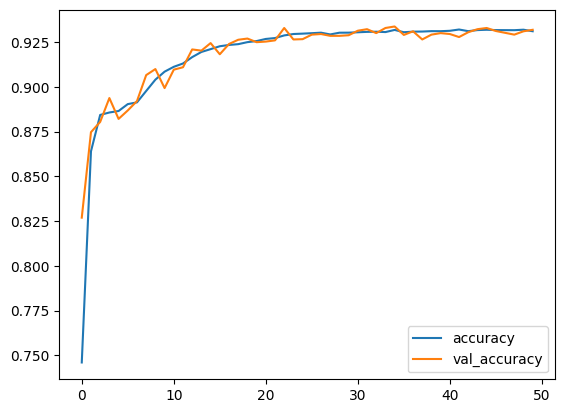

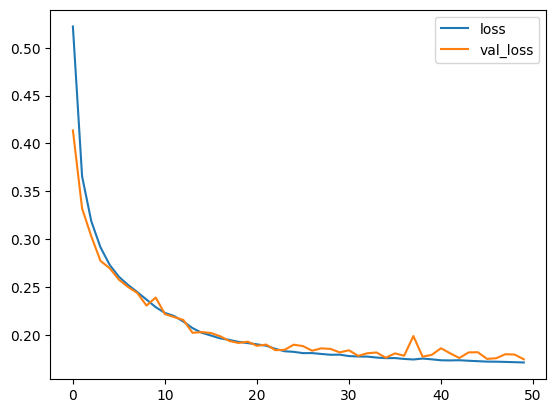

In [88]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

> Plot diatas menunjukkan performa model, pada plot yang membandingkan loss dan val loss terlihat expode pada epoch sekitar 36 namun dengan perubahan yang tidak signifikan. dapat dilihat performa model pada akurasi naik terus mendekati 1 dan pada evaluasi turun mendekati 0.

116/116 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3353
           1       0.94      0.93      0.93      4049

    accuracy                           0.93      7402
   macro avg       0.93      0.93      0.93      7402
weighted avg       0.93      0.93      0.93      7402



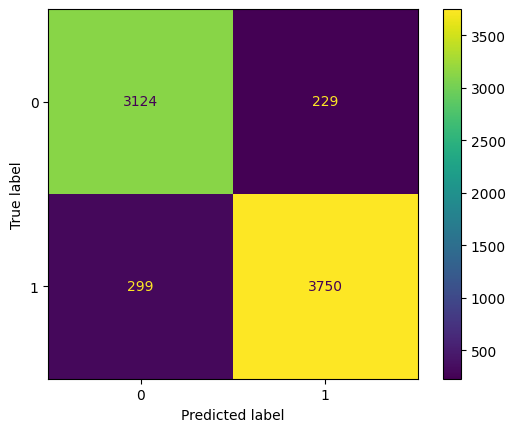

In [89]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(test_pipe)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

> Dari Hasil evaluasi model menggunakan metric accuracy dapat dilihat akurasi model 0.93 atau akurasi sebesar 93%.

##6.2. Functional API

###6.2.1. Model Definition

In [90]:
# Create Functional Model

input_layer = Input(shape=(10,))
hidden_layer_1 = Dense(8, activation='relu')(input_layer)
hidden_layer_2 = Dense(8, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(8, activation='relu')(hidden_layer_2)

concat_layer = concatenate([input_layer, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense_38 (Dense)               (None, 8)            88          ['input_8[0][0]']                
                                                                                                  
 dense_39 (Dense)               (None, 8)            72          ['dense_38[0][0]']               
                                                                                                  
 dense_40 (Dense)               (None, 8)            72          ['dense_39[0][0]']               
                                                                                              

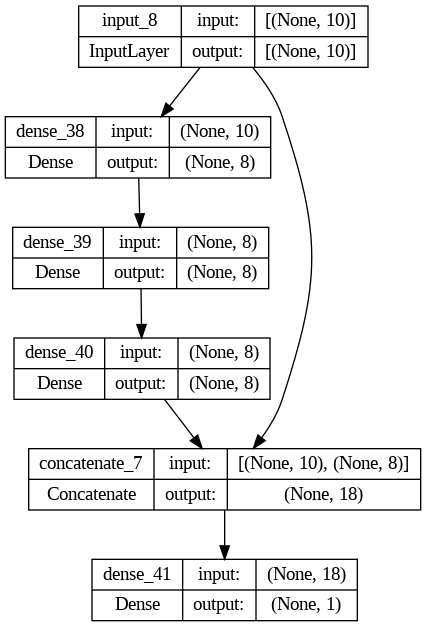

In [91]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

###6.2.2 Model Training

In [92]:
# Train the Model

%%time
history_func = model_functional.fit(X_train_handling,
                                    y_train,
                                    epochs=50,
                                    validation_data=(X_val_handling, y_val))

Epoch 1/50
741/741 [==============================] - 7s 6ms/step - loss: 0.5873 - accuracy: 0.6920 - val_loss: 0.5247 - val_accuracy: 0.7553
Epoch 2/50
741/741 [==============================] - 5s 6ms/step - loss: 0.5239 - accuracy: 0.7558 - val_loss: 0.5162 - val_accuracy: 0.7582
Epoch 3/50
741/741 [==============================] - 5s 7ms/step - loss: 0.5138 - accuracy: 0.7661 - val_loss: 0.5068 - val_accuracy: 0.7682
Epoch 4/50
741/741 [==============================] - 4s 6ms/step - loss: 0.5022 - accuracy: 0.7710 - val_loss: 0.4953 - val_accuracy: 0.7629
Epoch 5/50
741/741 [==============================] - 3s 4ms/step - loss: 0.4831 - accuracy: 0.7842 - val_loss: 0.4558 - val_accuracy: 0.7952
Epoch 6/50
741/741 [==============================] - 4s 6ms/step - loss: 0.4160 - accuracy: 0.8217 - val_loss: 0.3757 - val_accuracy: 0.8413
Epoch 7/50
741/741 [==============================] - 4s 5ms/step - loss: 0.3472 - accuracy: 0.8627 - val_loss: 0.3277 - val_accuracy: 0.8750
Epoch 

###6.2.3. Model Evaluation

In [93]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.587277,0.692012,0.524679,0.755319
1,0.523863,0.755763,0.516213,0.758190
2,0.513789,0.766149,0.506816,0.768153
3,0.502235,0.771046,0.495265,0.762918
4,0.483091,0.784219,0.455814,0.795171
5,0.416037,0.821667,0.375698,0.841270
6,0.347179,0.862661,0.327667,0.875042
7,0.312375,0.876720,0.308720,0.870652
8,0.294168,0.881196,0.302955,0.867781
9,0.282605,0.882167,0.294428,0.865079


<Axes: >

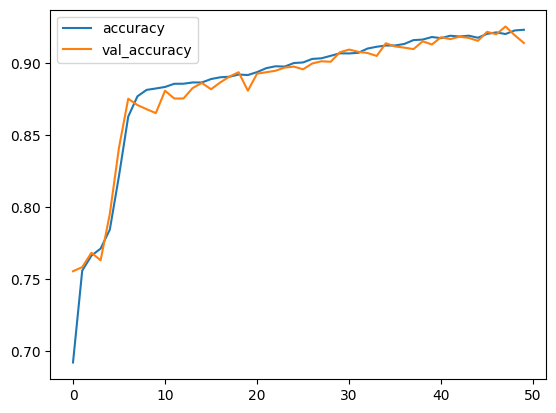

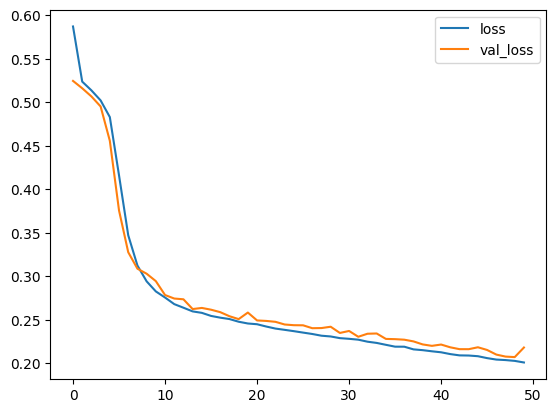

In [94]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

232/232 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3353
           1       0.92      0.94      0.93      4049

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



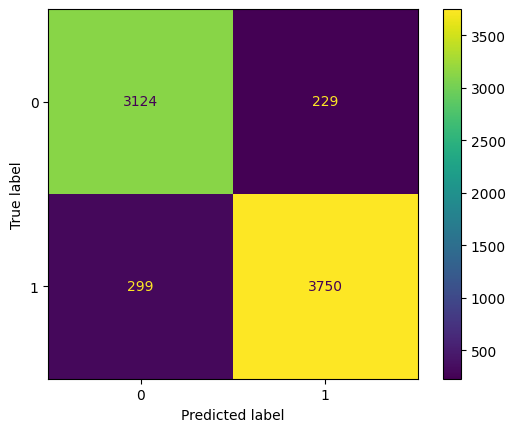

In [95]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test_handling)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

# 7. Improve Model

> Pada Improve Model saya menggunakan BatchNormalization dan Dropout pada setiap model yang dibuat

##7.1. Sequential API - Improve Hidden Layer Activation Function Using Softmax

###7.1.1. Model Definition - Improve Hidden LayerActivation Function Using Softmax

In [147]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(10, activation='softmax', input_shape=(10,))) # Input Layer
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='softmax')) # Hidden Layer 1
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='softmax')) # Hidden Layer 2
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='softmax')) # Hidden Layer 3
model_sequential.add(tf.keras.layers.Dropout(0.1))
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_21 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_88 (Dense)            (None, 8)                 88        
                                                                 
 batch_normalization_22 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_89 (Dense)            (None, 8)                 72        
                                                                 
 batch_normalization_23 (Bat  (None, 8)               

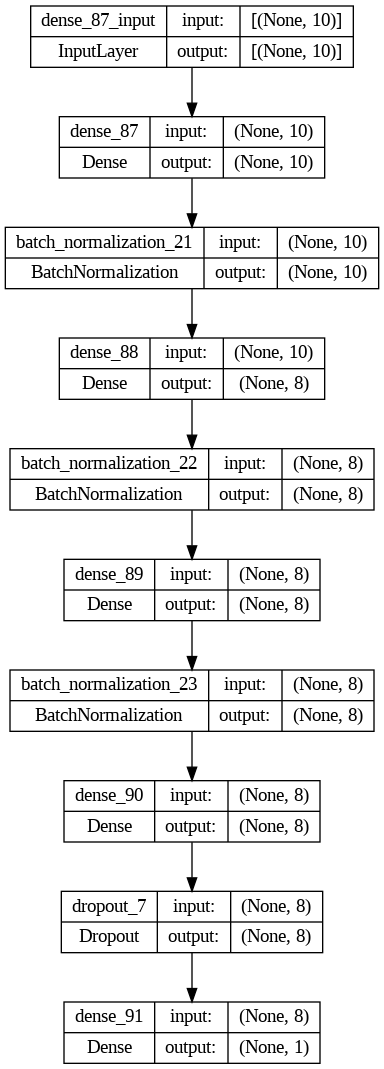

In [148]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

###7.1.2. Model Training - Improve Hidden Layer Activation Function Using Softmax

In [149]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe))

Epoch 1/50
1113/1113 [==============================] - 11s 7ms/step - loss: 0.5398 - accuracy: 0.7624 - val_loss: 0.4291 - val_accuracy: 0.8088
Epoch 2/50
1113/1113 [==============================] - 8s 7ms/step - loss: 0.3796 - accuracy: 0.8130 - val_loss: 0.3058 - val_accuracy: 0.8565
Epoch 3/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.3305 - accuracy: 0.8406 - val_loss: 0.2730 - val_accuracy: 0.9024
Epoch 4/50
1113/1113 [==============================] - 10s 9ms/step - loss: 0.3095 - accuracy: 0.8552 - val_loss: 0.2495 - val_accuracy: 0.9108
Epoch 5/50
1113/1113 [==============================] - 9s 8ms/step - loss: 0.2912 - accuracy: 0.8729 - val_loss: 0.2315 - val_accuracy: 0.9196
Epoch 6/50
1113/1113 [==============================] - 8s 7ms/step - loss: 0.2798 - accuracy: 0.8821 - val_loss: 0.2215 - val_accuracy: 0.9233
Epoch 7/50
1113/1113 [==============================] - 7s 7ms/step - loss: 0.2648 - accuracy: 0.8877 - val_loss: 0.2161 - val_accurac

###7.1.3. Model Evaluation - Improve Hidden Layer Activation Function Using Softmax

In [150]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.539753,0.762419,0.429074,0.808848
1,0.379611,0.812998,0.305767,0.856467
2,0.330511,0.840553,0.273019,0.902398
3,0.309489,0.855231,0.249535,0.910841
4,0.291209,0.872878,0.231474,0.919622
5,0.279792,0.882139,0.221540,0.923337
6,0.264837,0.887697,0.216120,0.926039
7,0.255202,0.893130,0.211150,0.923843
8,0.250696,0.898717,0.211932,0.920128
9,0.246626,0.905078,0.209283,0.921648


<Axes: >

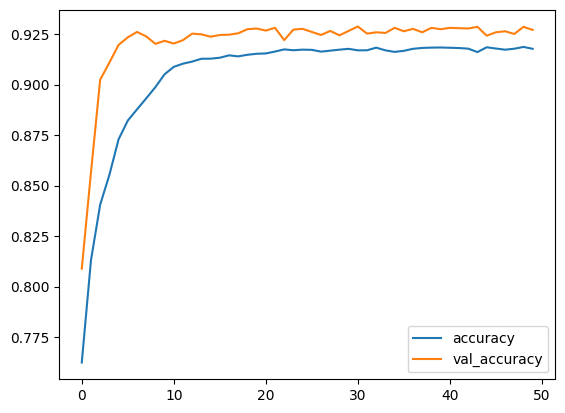

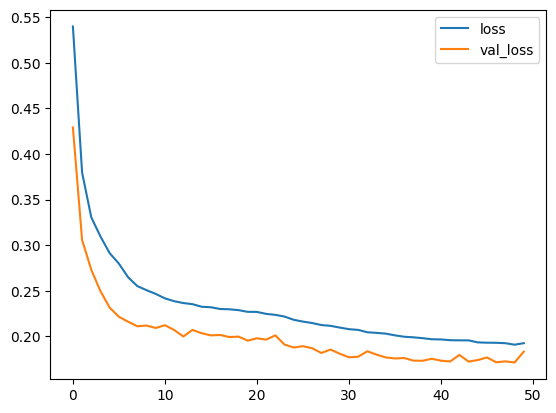

In [151]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

116/116 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3353
           1       0.96      0.90      0.93      4049

    accuracy                           0.92      7402
   macro avg       0.92      0.93      0.92      7402
weighted avg       0.93      0.92      0.92      7402



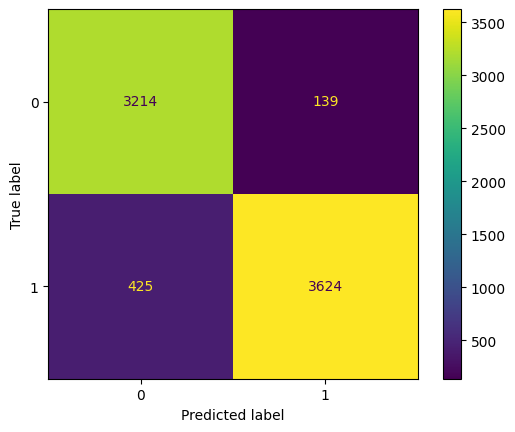

In [152]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(test_pipe)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

### 7.1.4. Model Saving

In [153]:
# Save ANN Model

model_sequential.save('seq_imp_soft.h5')

##7.2. Sequential API - Improve Hidden Layer Activation Function Using tanh

###7.2.1. Model Definition - Improve Hidden Layer Activation Function Using tanh

In [154]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(10, activation='tanh', input_shape=(10,))) # Input Layer
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='tanh')) # Hidden Layer 1
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='tanh')) # Hidden Layer 2
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='tanh')) # Hidden Layer 3
model_sequential.add(tf.keras.layers.Dropout(0.1))
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_24 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_93 (Dense)            (None, 8)                 88        
                                                                 
 batch_normalization_25 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_94 (Dense)            (None, 8)                 72        
                                                                 
 batch_normalization_26 (Bat  (None, 8)              

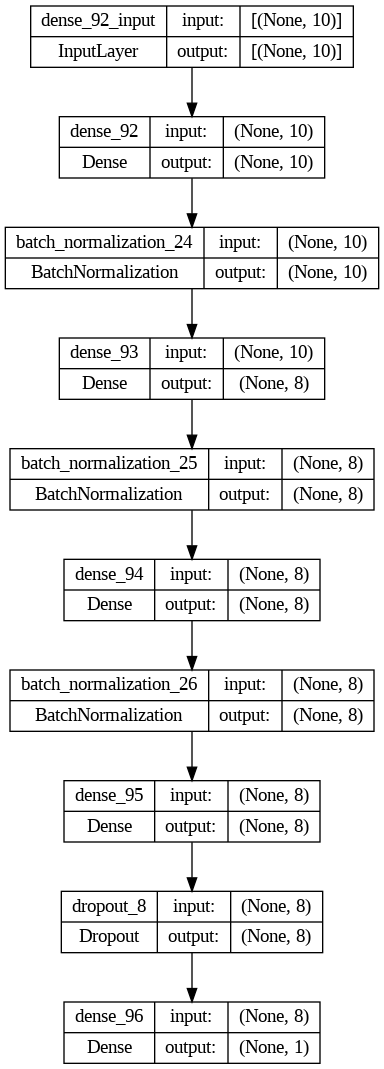

In [155]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

###7.2.2. Model Training - Improve Hidden Layer Activation Function Using tanh

In [156]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe))

Epoch 1/50
1113/1113 [==============================] - 11s 7ms/step - loss: 0.5139 - accuracy: 0.7529 - val_loss: 0.4212 - val_accuracy: 0.8219
Epoch 2/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.3480 - accuracy: 0.8623 - val_loss: 0.2727 - val_accuracy: 0.9031
Epoch 3/50
1113/1113 [==============================] - 7s 7ms/step - loss: 0.2981 - accuracy: 0.8856 - val_loss: 0.2427 - val_accuracy: 0.9070
Epoch 4/50
1113/1113 [==============================] - 7s 7ms/step - loss: 0.2710 - accuracy: 0.8953 - val_loss: 0.2178 - val_accuracy: 0.9176
Epoch 5/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.2483 - accuracy: 0.9041 - val_loss: 0.1988 - val_accuracy: 0.9247
Epoch 6/50
1113/1113 [==============================] - 7s 7ms/step - loss: 0.2325 - accuracy: 0.9092 - val_loss: 0.1914 - val_accuracy: 0.9284
Epoch 7/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.2266 - accuracy: 0.9114 - val_loss: 0.1906 - val_accuracy

###7.2.3. Model Evaluation - Improve Hidden Layer Activation Function Using tanh

In [157]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.513887,0.752878,0.421240,0.821851
1,0.348047,0.862338,0.272687,0.903073
2,0.298137,0.885615,0.242696,0.906957
3,0.271033,0.895311,0.217801,0.917595
4,0.248279,0.904106,0.198765,0.924688
5,0.232521,0.909159,0.191412,0.928403
6,0.226610,0.911368,0.190610,0.926039
7,0.222390,0.912424,0.185684,0.927558
8,0.220446,0.913676,0.182291,0.923843
9,0.216051,0.914450,0.188522,0.920635


<Axes: >

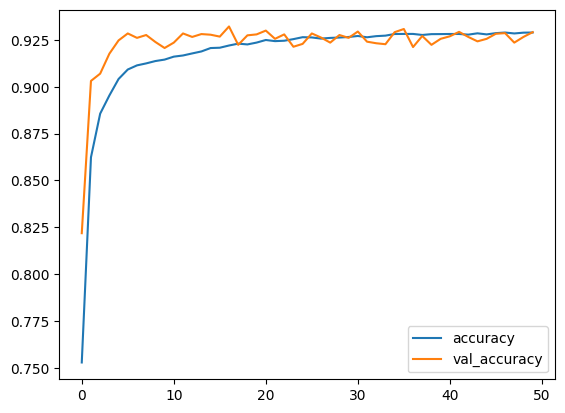

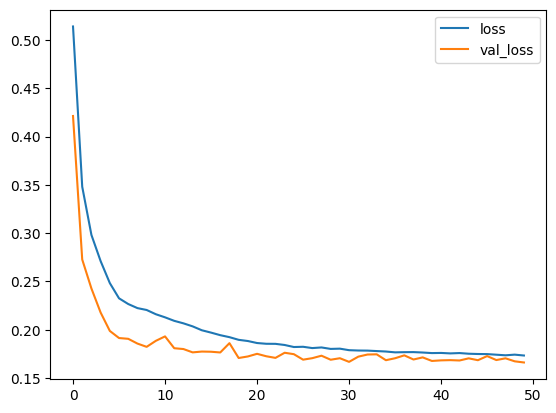

In [158]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

116/116 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3353
           1       0.94      0.92      0.93      4049

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



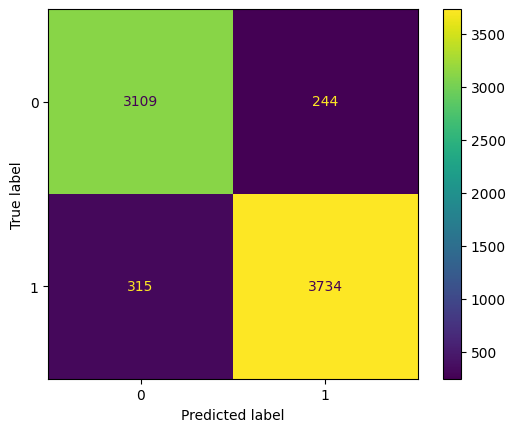

In [159]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(test_pipe)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

### 7.2.4. Model Saving

In [160]:
# Save ANN Model

model_sequential.save('seq_imp_tanh.h5')

##7.3. Sequential API - Improve Hidden Layer Activation Function Using Relu

###7.3.1. Model Definition - Improve Hidden Layer Activation Function Using Relu

In [161]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(10, activation='softmax', input_shape=(10,))) # Input Layer
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='softmax')) # Hidden Layer 1
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='softmax')) # Hidden Layer 2
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='softmax')) # Hidden Layer 3
model_sequential.add(tf.keras.layers.Dropout(0.1))
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_27 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_98 (Dense)            (None, 8)                 88        
                                                                 
 batch_normalization_28 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_99 (Dense)            (None, 8)                 72        
                                                                 
 batch_normalization_29 (Bat  (None, 8)              

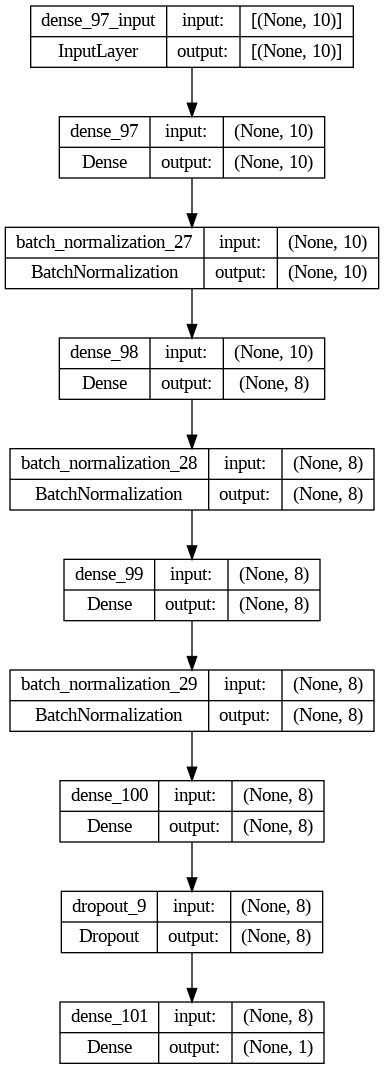

In [162]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

###7.3.2. Model Training - Improve Hidden Layer Activation Function Using Relu

In [163]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe))

Epoch 1/50
1113/1113 [==============================] - 11s 7ms/step - loss: 0.5311 - accuracy: 0.7761 - val_loss: 0.4251 - val_accuracy: 0.8416
Epoch 2/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.4067 - accuracy: 0.8278 - val_loss: 0.3290 - val_accuracy: 0.8690
Epoch 3/50
1113/1113 [==============================] - 8s 7ms/step - loss: 0.3556 - accuracy: 0.8425 - val_loss: 0.2956 - val_accuracy: 0.8671
Epoch 4/50
1113/1113 [==============================] - 10s 9ms/step - loss: 0.3294 - accuracy: 0.8579 - val_loss: 0.2785 - val_accuracy: 0.8801
Epoch 5/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.3124 - accuracy: 0.8641 - val_loss: 0.2617 - val_accuracy: 0.8892
Epoch 6/50
1113/1113 [==============================] - 8s 7ms/step - loss: 0.3009 - accuracy: 0.8690 - val_loss: 0.2531 - val_accuracy: 0.8948
Epoch 7/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.2898 - accuracy: 0.8777 - val_loss: 0.2437 - val_accurac

###7.3.3. Model Evaluation - Improve Hidden Layer Activation Function Using Relu

In [164]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.531074,0.776127,0.425134,0.841608
1,0.406658,0.827845,0.328958,0.868963
2,0.355555,0.842537,0.295594,0.867106
3,0.329408,0.857863,0.278528,0.880108
4,0.312416,0.864139,0.261740,0.889227
5,0.300887,0.868994,0.253130,0.894799
6,0.289848,0.877663,0.243697,0.904424
7,0.278758,0.888725,0.218177,0.916245
8,0.264687,0.899561,0.223555,0.914049
9,0.256108,0.902713,0.207251,0.922661


<Axes: >

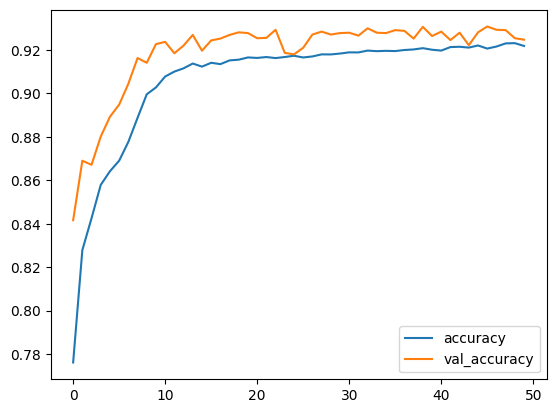

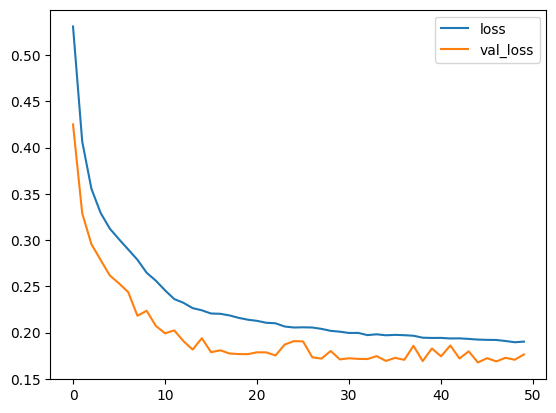

In [165]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

116/116 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3353
           1       0.93      0.93      0.93      4049

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



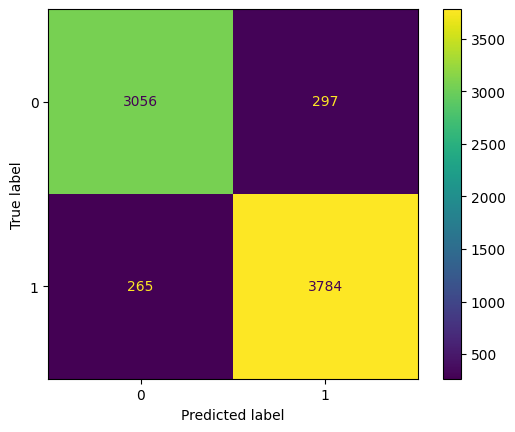

In [166]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(test_pipe)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

### 7.3.4. Model Saving

In [167]:
# Save ANN Model

model_sequential.save('seq_imp_relu.h5')

##7.4. Sequential API - Improve Hidden Layer Activation Function Using tanh Optimizer SGD

###7.4.1. Model Definition - Improve Hidden Layer Activation Function Using tanh Optimizer SGD

In [188]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(10, activation='tanh', input_shape=(10,))) # Input Layer
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='tanh')) # Hidden Layer 1
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='tanh')) # Hidden Layer 2
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='tanh')) # Hidden Layer 3
model_sequential.add(tf.keras.layers.Dropout(0.1))
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 10)                110       
                                                                 
 batch_normalization_36 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_117 (Dense)           (None, 8)                 88        
                                                                 
 batch_normalization_37 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_118 (Dense)           (None, 8)                 72        
                                                                 
 batch_normalization_38 (Bat  (None, 8)              

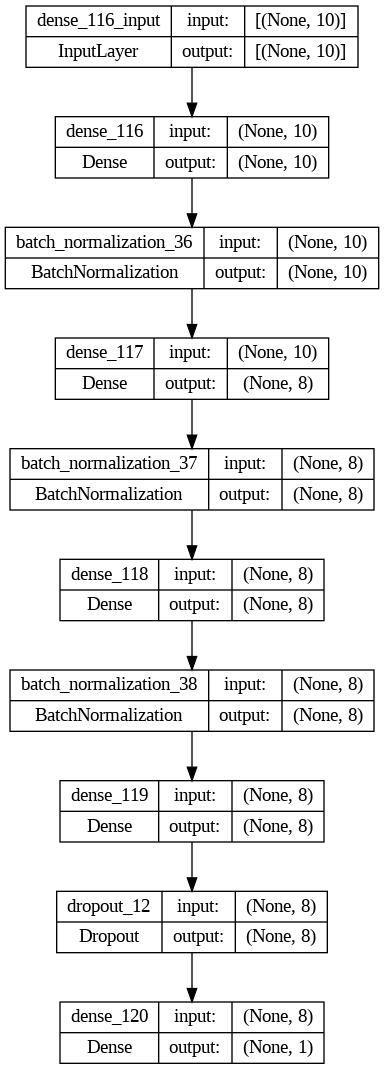

In [189]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

###7.4.2. Model Training - Improve Hidden Layer Activation Function Using tanh Optimizer SGD

In [190]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe))

Epoch 1/50
1113/1113 [==============================] - 11s 8ms/step - loss: 0.5787 - accuracy: 0.7075 - val_loss: 0.5341 - val_accuracy: 0.7484
Epoch 2/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.5132 - accuracy: 0.7596 - val_loss: 0.4389 - val_accuracy: 0.8092
Epoch 3/50
1113/1113 [==============================] - 8s 7ms/step - loss: 0.4066 - accuracy: 0.8279 - val_loss: 0.3444 - val_accuracy: 0.8631
Epoch 4/50
1113/1113 [==============================] - 10s 9ms/step - loss: 0.3596 - accuracy: 0.8536 - val_loss: 0.3240 - val_accuracy: 0.8735
Epoch 5/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.3448 - accuracy: 0.8633 - val_loss: 0.2992 - val_accuracy: 0.8874
Epoch 6/50
1113/1113 [==============================] - 8s 7ms/step - loss: 0.3315 - accuracy: 0.8706 - val_loss: 0.2824 - val_accuracy: 0.8943
Epoch 7/50
1113/1113 [==============================] - 8s 7ms/step - loss: 0.3033 - accuracy: 0.8857 - val_loss: 0.2345 - val_accurac

###7.4.3. Model Evaluation - Improve Hidden Layer Activation Function Using tanh Optimizer SGD

In [191]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.578673,0.707478,0.534128,0.748396
1,0.513181,0.759605,0.438904,0.809186
2,0.406556,0.827873,0.344380,0.863053
3,0.359556,0.853570,0.323959,0.873522
4,0.344800,0.863267,0.299151,0.887369
5,0.331519,0.870641,0.282412,0.894292
6,0.303297,0.885741,0.234491,0.918440
7,0.255863,0.905823,0.222710,0.915907
8,0.237189,0.910805,0.200032,0.923674
9,0.228946,0.912832,0.193115,0.924688


<Axes: >

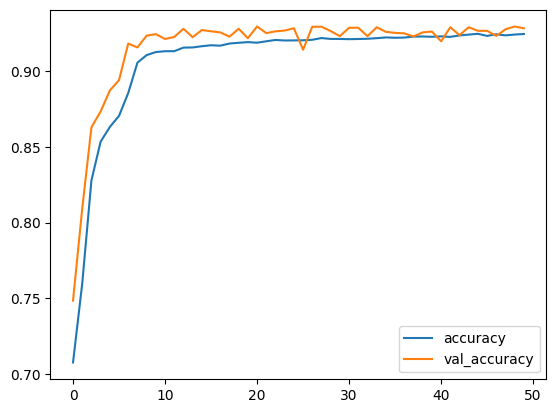

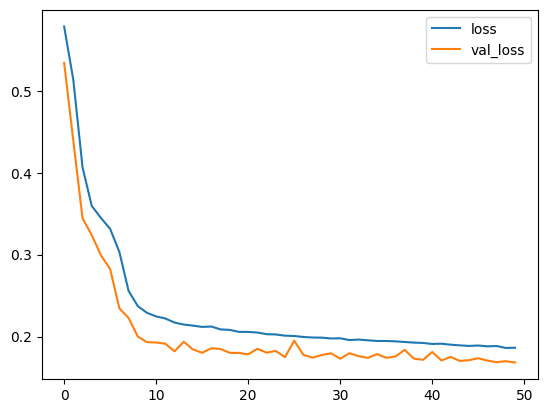

In [192]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

116/116 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3353
           1       0.93      0.93      0.93      4049

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



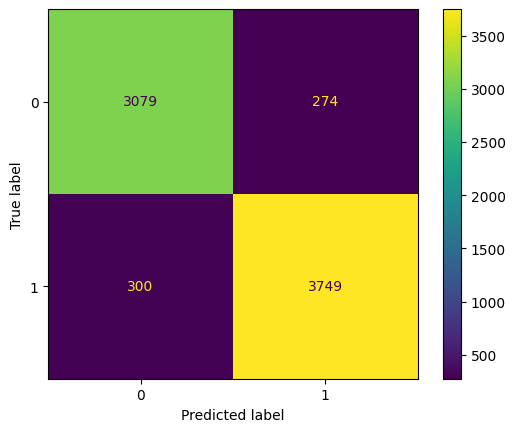

In [193]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(test_pipe)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

### 7.4.4. Model Saving

In [194]:
# Save ANN Model

model_sequential.save('seq_imp_tanh_sgd.h5')

##7.5. Sequential API - Improve Hidden Layer Activation Function Using tanh Optimizer Adamax

###7.5.1. Model Definition - Improve Hidden Layer Activation Function Using tanh Optimizer Adamax

In [195]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(10, activation='tanh', input_shape=(10,))) # Input Layer
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='tanh')) # Hidden Layer 1
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='tanh')) # Hidden Layer 2
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(8, activation='tanh')) # Hidden Layer 3
model_sequential.add(tf.keras.layers.Dropout(0.1))
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adamax',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 10)                110       
                                                                 
 batch_normalization_39 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_122 (Dense)           (None, 8)                 88        
                                                                 
 batch_normalization_40 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dense_123 (Dense)           (None, 8)                 72        
                                                                 
 batch_normalization_41 (Bat  (None, 8)              

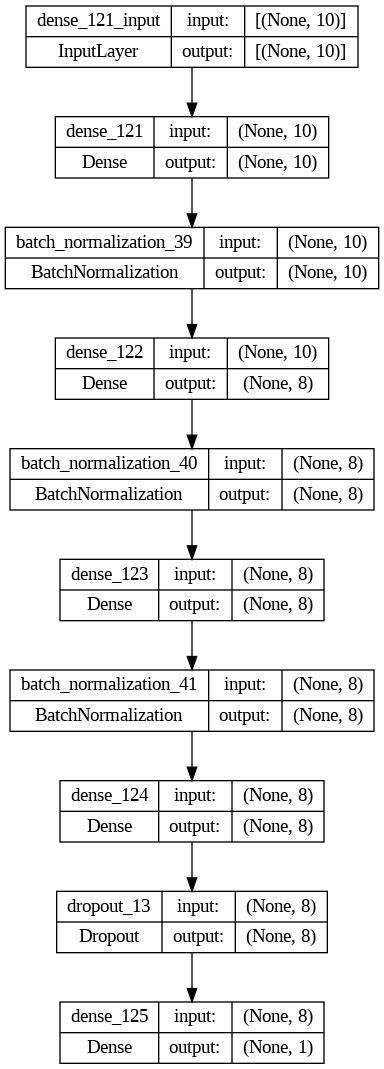

In [196]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

###7.5.2. Model Training - Improve Hidden Layer Activation Function Using tanh Optimizer Adamax

In [197]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe))

Epoch 1/50
1113/1113 [==============================] - 11s 7ms/step - loss: 0.5672 - accuracy: 0.7174 - val_loss: 0.5245 - val_accuracy: 0.7487
Epoch 2/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.5172 - accuracy: 0.7557 - val_loss: 0.4762 - val_accuracy: 0.7720
Epoch 3/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.4452 - accuracy: 0.7946 - val_loss: 0.3834 - val_accuracy: 0.8404
Epoch 4/50
1113/1113 [==============================] - 8s 7ms/step - loss: 0.3788 - accuracy: 0.8400 - val_loss: 0.3381 - val_accuracy: 0.8666
Epoch 5/50
1113/1113 [==============================] - 9s 8ms/step - loss: 0.3489 - accuracy: 0.8560 - val_loss: 0.3129 - val_accuracy: 0.8784
Epoch 6/50
1113/1113 [==============================] - 7s 6ms/step - loss: 0.3374 - accuracy: 0.8624 - val_loss: 0.3024 - val_accuracy: 0.8821
Epoch 7/50
1113/1113 [==============================] - 8s 7ms/step - loss: 0.3297 - accuracy: 0.8673 - val_loss: 0.2951 - val_accuracy

###7.5.3. Model Evaluation - Improve Hidden Layer Activation Function Using tanh Optimizer Adamax

In [198]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.567231,0.717400,0.524451,0.748734
1,0.517208,0.755650,0.476182,0.772036
2,0.445151,0.794618,0.383371,0.840426
3,0.378769,0.839976,0.338055,0.866599
4,0.348877,0.855977,0.312936,0.878419
5,0.337385,0.862436,0.302388,0.882134
6,0.329715,0.867306,0.295134,0.886018
7,0.322844,0.872217,0.288388,0.890746
8,0.312150,0.877860,0.270928,0.898683
9,0.292462,0.887106,0.245688,0.907633


<Axes: >

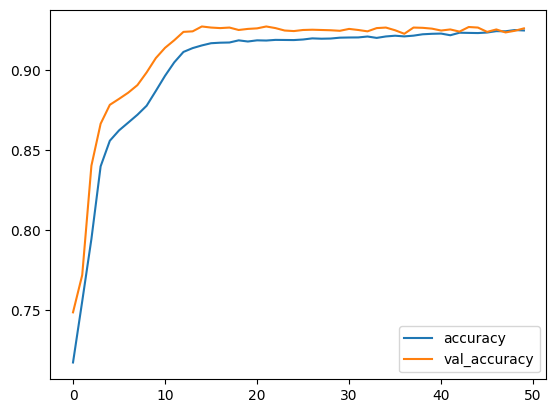

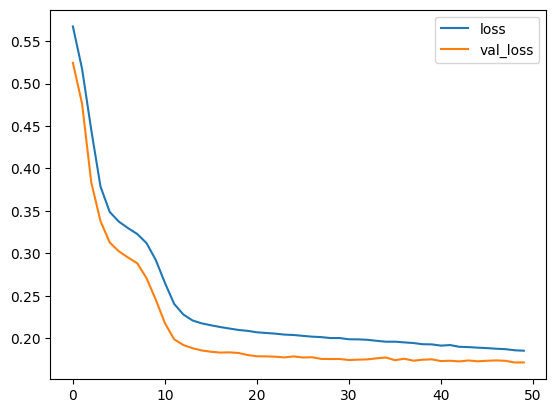

In [199]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

116/116 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3353
           1       0.94      0.92      0.93      4049

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



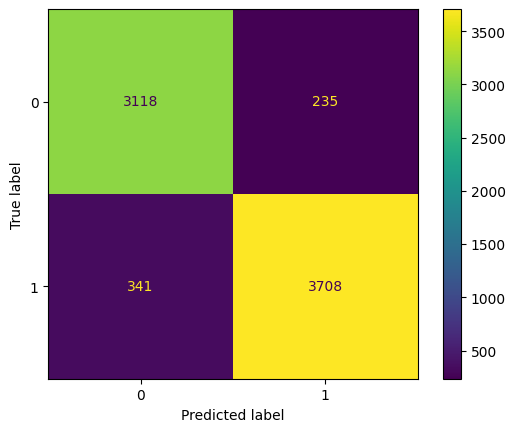

In [200]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(test_pipe)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

### 7.5.4. Model Saving

In [201]:
# Save ANN Model

model_sequential.save('seq_imp_tanh_adamax.h5')

##7.6. Functional API - Improve Hidden Layer Activation Function Using Softmax Optimizer adam

###7.6.1. Model Definition - Improve Hidden Layer Activation Function Using Softmax Optimizer adam

In [202]:
# Create Functional Model

input_layer = Input(shape=(10,))
hidden_layer_1 = Dense(8, activation='softmax')(input_layer)
hidden_layer_2 = Dense(8, activation='softmax')(hidden_layer_1)
hidden_layer_3 = Dense(8, activation='softmax')(hidden_layer_2)

concat_layer = concatenate([input_layer, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 dense_126 (Dense)              (None, 8)            88          ['input_14[0][0]']               
                                                                                                  
 dense_127 (Dense)              (None, 8)            72          ['dense_126[0][0]']              
                                                                                                  
 dense_128 (Dense)              (None, 8)            72          ['dense_127[0][0]']              
                                                                                            

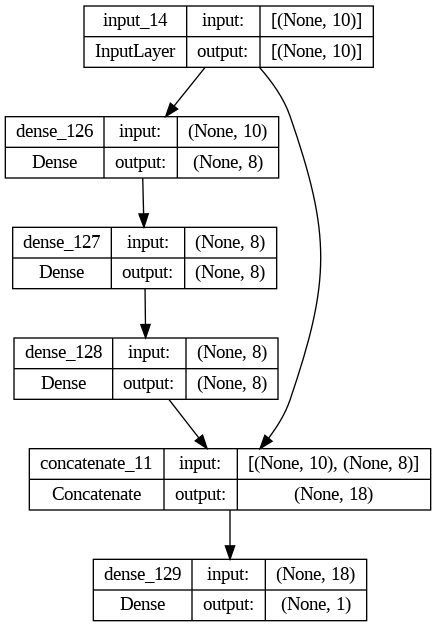

In [203]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

###7.6.2 Model Training - Improve Hidden Layer Activation Function Using Softmax Optimizer adam

In [204]:
# Train the Model

%%time
history_func = model_functional.fit(X_train_handling,
                                    y_train,
                                    epochs=50,
                                    validation_data=(X_val_handling, y_val))

Epoch 1/50
741/741 [==============================] - 6s 6ms/step - loss: 0.6353 - accuracy: 0.6585 - val_loss: 0.5638 - val_accuracy: 0.7315
Epoch 2/50
741/741 [==============================] - 3s 4ms/step - loss: 0.5442 - accuracy: 0.7468 - val_loss: 0.5300 - val_accuracy: 0.7570
Epoch 3/50
741/741 [==============================] - 3s 4ms/step - loss: 0.4948 - accuracy: 0.7742 - val_loss: 0.4387 - val_accuracy: 0.8031
Epoch 4/50
741/741 [==============================] - 3s 5ms/step - loss: 0.4052 - accuracy: 0.8209 - val_loss: 0.3758 - val_accuracy: 0.8396
Epoch 5/50
741/741 [==============================] - 4s 5ms/step - loss: 0.3622 - accuracy: 0.8486 - val_loss: 0.3520 - val_accuracy: 0.8524
Epoch 6/50
741/741 [==============================] - 3s 5ms/step - loss: 0.3440 - accuracy: 0.8578 - val_loss: 0.3407 - val_accuracy: 0.8575
Epoch 7/50
741/741 [==============================] - 3s 4ms/step - loss: 0.3351 - accuracy: 0.8619 - val_loss: 0.3343 - val_accuracy: 0.8614
Epoch 

###7.6.3. Model Evaluation - Improve Hidden Layer Activation Function Using Softmax Optimizer adam

In [205]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.635282,0.658532,0.563835,0.731510
1,0.544243,0.746812,0.529975,0.757008
2,0.494843,0.774213,0.438681,0.803107
3,0.405197,0.820865,0.375795,0.839581
4,0.362156,0.848603,0.351978,0.852415
5,0.344021,0.857849,0.340722,0.857481
6,0.335145,0.861944,0.334269,0.861364
7,0.330632,0.861902,0.331005,0.863728
8,0.328325,0.862788,0.335049,0.853934
9,0.326652,0.863041,0.329749,0.859845


<Axes: >

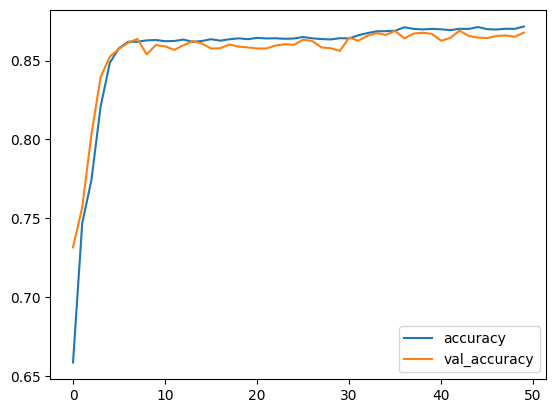

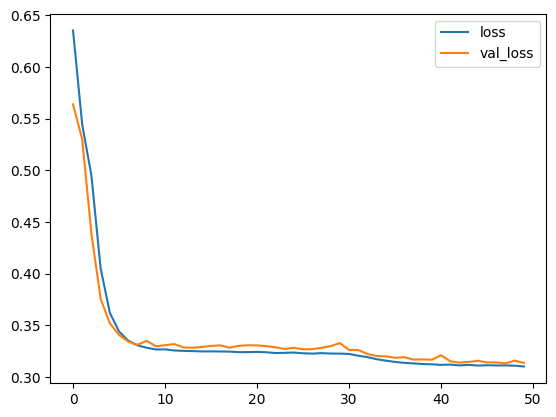

In [206]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

232/232 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3353
           1       0.89      0.87      0.88      4049

    accuracy                           0.87      7402
   macro avg       0.87      0.87      0.87      7402
weighted avg       0.87      0.87      0.87      7402



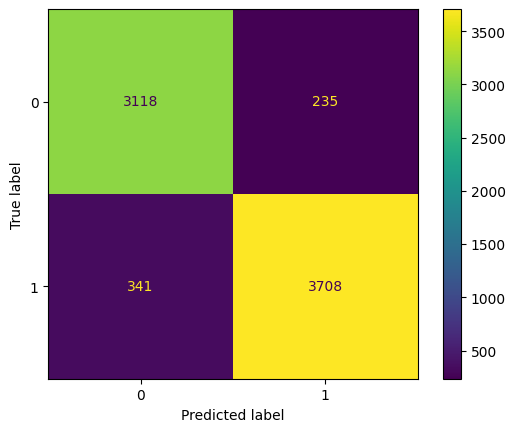

In [207]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test_handling)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

### 7.6.4. Model Saving

In [208]:
# Save ANN Model

model_functional.save('func_imp_soft.h5')

##7.7. Functional API - Improve Hidden Layer Activation Function Using tanh Optimizer adam

###7.7.1. Model Definition - Improve Hidden Layer Activation Function Using tanh Optimizer adam

In [209]:
# Create Functional Model

input_layer = Input(shape=(10,))
hidden_layer_1 = Dense(8, activation='tanh')(input_layer)
hidden_layer_2 = Dense(8, activation='tanh')(hidden_layer_1)
hidden_layer_3 = Dense(8, activation='tanh')(hidden_layer_2)

concat_layer = concatenate([input_layer, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 dense_130 (Dense)              (None, 8)            88          ['input_15[0][0]']               
                                                                                                  
 dense_131 (Dense)              (None, 8)            72          ['dense_130[0][0]']              
                                                                                                  
 dense_132 (Dense)              (None, 8)            72          ['dense_131[0][0]']              
                                                                                            

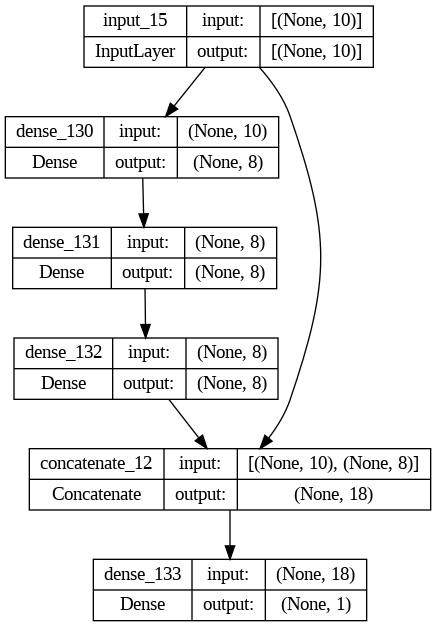

In [210]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

###7.7.2 Model Training - Improve Hidden Layer Activation Function Using tanh Optimizer adam

In [211]:
# Train the Model

%%time
history_func = model_functional.fit(X_train_handling,
                                    y_train,
                                    epochs=50,
                                    validation_data=(X_val_handling, y_val))

Epoch 1/50
741/741 [==============================] - 5s 5ms/step - loss: 0.5499 - accuracy: 0.7275 - val_loss: 0.4950 - val_accuracy: 0.7703
Epoch 2/50
741/741 [==============================] - 3s 4ms/step - loss: 0.4392 - accuracy: 0.8024 - val_loss: 0.3851 - val_accuracy: 0.8458
Epoch 3/50
741/741 [==============================] - 4s 5ms/step - loss: 0.3621 - accuracy: 0.8509 - val_loss: 0.3440 - val_accuracy: 0.8614
Epoch 4/50
741/741 [==============================] - 3s 4ms/step - loss: 0.3286 - accuracy: 0.8633 - val_loss: 0.3239 - val_accuracy: 0.8666
Epoch 5/50
741/741 [==============================] - 3s 4ms/step - loss: 0.3092 - accuracy: 0.8703 - val_loss: 0.3037 - val_accuracy: 0.8774
Epoch 6/50
741/741 [==============================] - 6s 8ms/step - loss: 0.2985 - accuracy: 0.8754 - val_loss: 0.2974 - val_accuracy: 0.8835
Epoch 7/50
741/741 [==============================] - 3s 5ms/step - loss: 0.2922 - accuracy: 0.8804 - val_loss: 0.2914 - val_accuracy: 0.8855
Epoch 

###7.7.3. Model Evaluation - Improve Hidden Layer Activation Function Using tanh Optimizer adam

In [212]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.549883,0.727518,0.495030,0.770348
1,0.439167,0.802373,0.385065,0.845829
2,0.362099,0.850882,0.344048,0.861364
3,0.328602,0.863337,0.323898,0.866599
4,0.309179,0.870261,0.303664,0.877406
5,0.298478,0.875369,0.297375,0.883485
6,0.292208,0.880394,0.291397,0.885512
7,0.287987,0.883391,0.299683,0.877744
8,0.285953,0.883813,0.285483,0.883823
9,0.281406,0.887993,0.292885,0.879770


<Axes: >

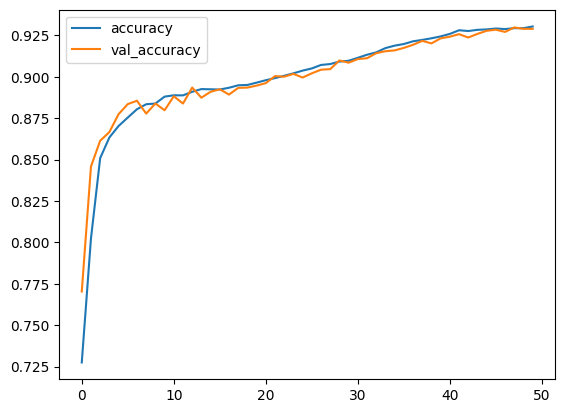

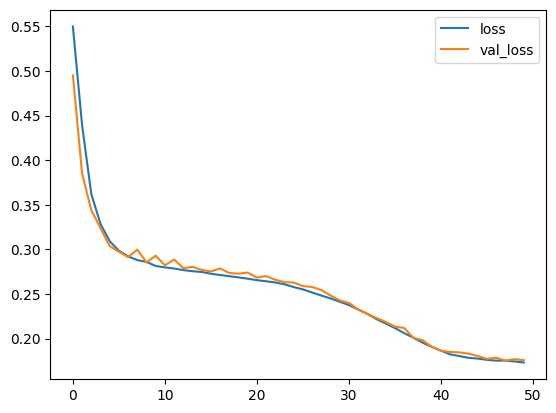

In [213]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

232/232 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3353
           1       0.96      0.91      0.93      4049

    accuracy                           0.93      7402
   macro avg       0.93      0.93      0.93      7402
weighted avg       0.93      0.93      0.93      7402



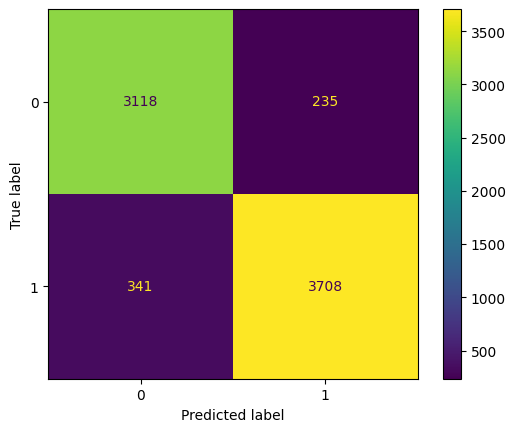

In [214]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test_handling)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

### 7.7.4. Model Saving

In [216]:
# Save ANN Model

model_functional.save('func_imp_tanh_adam.h5')

##7.8. Functional API - Improve Hidden Layer Activation Function Using tanh Oprimizer SGD

###7.8.1. Model Definition - Improve Hidden Layer Activation Function Using relu Optimizer SGD

In [217]:
# Create Functional Model

input_layer = Input(shape=(10,))
hidden_layer_1 = Dense(8, activation='tanh')(input_layer)
hidden_layer_2 = Dense(8, activation='tanh')(hidden_layer_1)
hidden_layer_3 = Dense(8, activation='tanh')(hidden_layer_2)

concat_layer = concatenate([input_layer, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics='accuracy')
model_functional.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 dense_134 (Dense)              (None, 8)            88          ['input_16[0][0]']               
                                                                                                  
 dense_135 (Dense)              (None, 8)            72          ['dense_134[0][0]']              
                                                                                                  
 dense_136 (Dense)              (None, 8)            72          ['dense_135[0][0]']              
                                                                                            

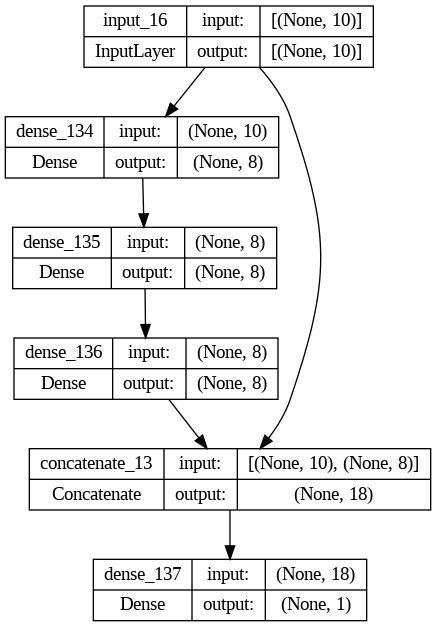

In [218]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

###7.8.2 Model Training - Improve Hidden Layer Activation Function Using tanh Optmizer SGD

In [219]:
# Train the Model

%%time
history_func = model_functional.fit(X_train_handling,
                                    y_train,
                                    epochs=50,
                                    validation_data=(X_val_handling, y_val))

Epoch 1/50
741/741 [==============================] - 4s 4ms/step - loss: 0.6043 - accuracy: 0.6797 - val_loss: 0.5371 - val_accuracy: 0.7528
Epoch 2/50
741/741 [==============================] - 4s 6ms/step - loss: 0.5326 - accuracy: 0.7514 - val_loss: 0.5295 - val_accuracy: 0.7474
Epoch 3/50
741/741 [==============================] - 5s 6ms/step - loss: 0.5281 - accuracy: 0.7542 - val_loss: 0.5248 - val_accuracy: 0.7579
Epoch 4/50
741/741 [==============================] - 3s 4ms/step - loss: 0.5254 - accuracy: 0.7576 - val_loss: 0.5233 - val_accuracy: 0.7573
Epoch 5/50
741/741 [==============================] - 5s 7ms/step - loss: 0.5235 - accuracy: 0.7588 - val_loss: 0.5204 - val_accuracy: 0.7585
Epoch 6/50
741/741 [==============================] - 4s 6ms/step - loss: 0.5214 - accuracy: 0.7602 - val_loss: 0.5213 - val_accuracy: 0.7518
Epoch 7/50
741/741 [==============================] - 3s 4ms/step - loss: 0.5189 - accuracy: 0.7605 - val_loss: 0.5159 - val_accuracy: 0.7606
Epoch 

###7.8.3. Model Evaluation - Improve Hidden Layer Activation Function Using tanh Oprimizer SGD

In [220]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.604344,0.679726,0.537084,0.752786
1,0.532583,0.751372,0.529473,0.747383
2,0.528134,0.754243,0.524785,0.757852
3,0.525439,0.757578,0.523271,0.757345
4,0.523453,0.758760,0.520384,0.758528
5,0.521438,0.760238,0.521276,0.751773
6,0.518915,0.760491,0.515947,0.760554
7,0.515629,0.761885,0.510802,0.762580
8,0.509394,0.765220,0.501622,0.763256
9,0.493993,0.772186,0.475597,0.777102


<Axes: >

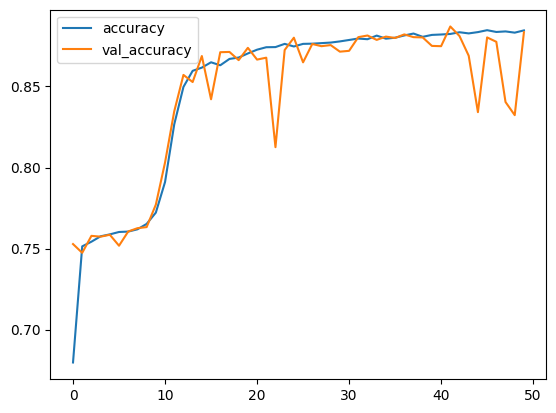

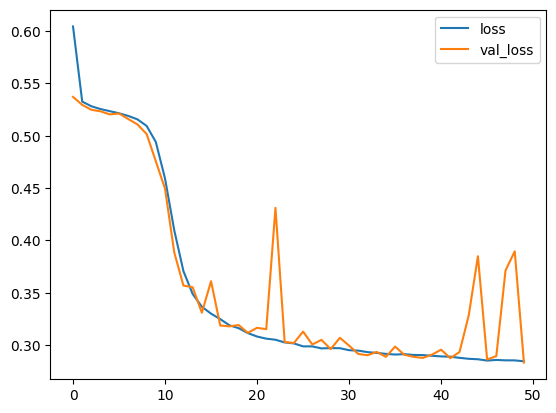

In [221]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

> Dari plot terlihat terjadi exploding, hal ini bisa dipengaruhi oleh learning rate karana pada model yang saya buat tidak menentukan learning rate atau menggunakan default, selain itu juga bisa disebabkan oleh pemiliha optimzer sgd. Exploding gradient menyebabkan akurasi model menjadi rendah.

232/232 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3353
           1       0.90      0.89      0.89      4049

    accuracy                           0.88      7402
   macro avg       0.88      0.88      0.88      7402
weighted avg       0.88      0.88      0.88      7402



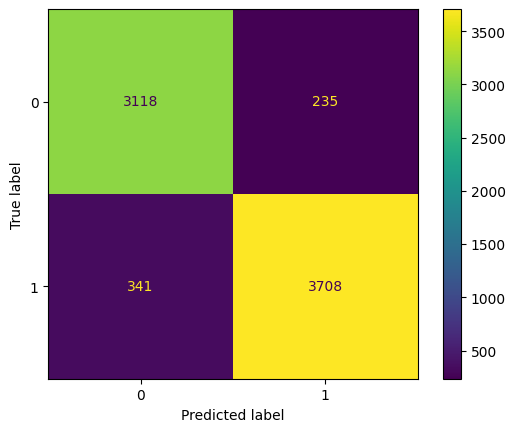

In [222]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test_handling)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

### 7.8.4. Model Saving

In [223]:
# Save ANN Model

model_functional.save('func_imp_tanh_sgd.h5')

##7.9. Functional API - Improve Hidden Layer Activation Function Using tanh Oprimizer adamax

###7.9.1. Model Definition - Improve Hidden Layer Activation Function Using relu Optimizer adamax

In [227]:
# Create Functional Model

input_layer = Input(shape=(10,))
hidden_layer_1 = Dense(8, activation='tanh')(input_layer)
hidden_layer_2 = Dense(8, activation='tanh')(hidden_layer_1)
hidden_layer_3 = Dense(8, activation='tanh')(hidden_layer_2)

concat_layer = concatenate([input_layer, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adamax',
                         metrics='accuracy')
model_functional.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 dense_142 (Dense)              (None, 8)            88          ['input_18[0][0]']               
                                                                                                  
 dense_143 (Dense)              (None, 8)            72          ['dense_142[0][0]']              
                                                                                                  
 dense_144 (Dense)              (None, 8)            72          ['dense_143[0][0]']              
                                                                                            

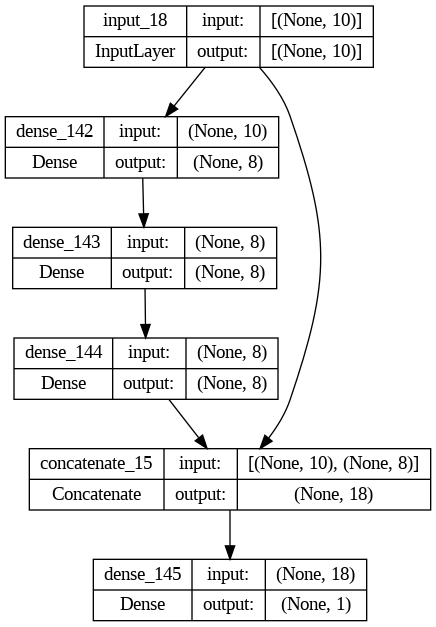

In [228]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

###7.9.2 Model Training - Improve Hidden Layer Activation Function Using tanh Optmizer adamax

In [229]:
# Train the Model

%%time
history_func = model_functional.fit(X_train_handling,
                                    y_train,
                                    epochs=50,
                                    validation_data=(X_val_handling, y_val))

Epoch 1/50
741/741 [==============================] - 6s 6ms/step - loss: 0.6726 - accuracy: 0.6433 - val_loss: 0.5544 - val_accuracy: 0.7244
Epoch 2/50
741/741 [==============================] - 3s 4ms/step - loss: 0.5439 - accuracy: 0.7418 - val_loss: 0.5301 - val_accuracy: 0.7497
Epoch 3/50
741/741 [==============================] - 5s 7ms/step - loss: 0.5308 - accuracy: 0.7539 - val_loss: 0.5212 - val_accuracy: 0.7565
Epoch 4/50
741/741 [==============================] - 6s 7ms/step - loss: 0.5235 - accuracy: 0.7621 - val_loss: 0.5153 - val_accuracy: 0.7709
Epoch 5/50
741/741 [==============================] - 3s 4ms/step - loss: 0.5173 - accuracy: 0.7675 - val_loss: 0.5092 - val_accuracy: 0.7754
Epoch 6/50
741/741 [==============================] - 3s 4ms/step - loss: 0.5115 - accuracy: 0.7727 - val_loss: 0.5014 - val_accuracy: 0.7754
Epoch 7/50
741/741 [==============================] - 4s 6ms/step - loss: 0.5047 - accuracy: 0.7758 - val_loss: 0.4952 - val_accuracy: 0.7781
Epoch 

###7.9.3. Model Evaluation - Improve Hidden Layer Activation Function Using tanh Oprimizer adamax

In [230]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.672626,0.643334,0.554355,0.724417
1,0.543889,0.741788,0.530117,0.749747
2,0.530796,0.753905,0.521232,0.756501
3,0.523529,0.762138,0.515268,0.770854
4,0.517317,0.767458,0.509177,0.775414
5,0.511458,0.772735,0.501449,0.775414
6,0.504729,0.775817,0.495196,0.778116
7,0.495632,0.778519,0.482025,0.780311
8,0.479678,0.786878,0.461616,0.794495
9,0.447726,0.805328,0.424011,0.816278


<Axes: >

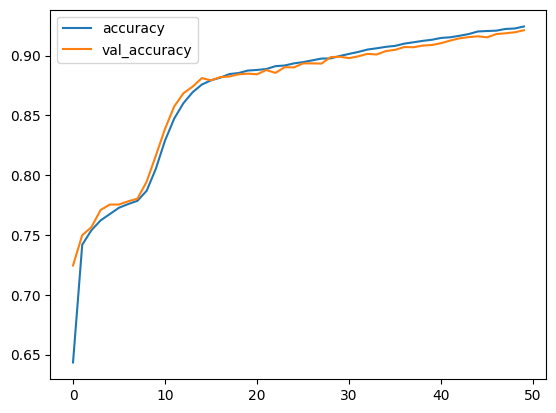

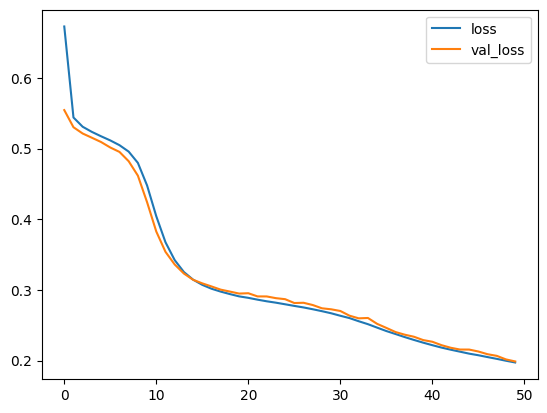

In [231]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

232/232 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3353
           1       0.93      0.92      0.93      4049

    accuracy                           0.92      7402
   macro avg       0.92      0.92      0.92      7402
weighted avg       0.92      0.92      0.92      7402



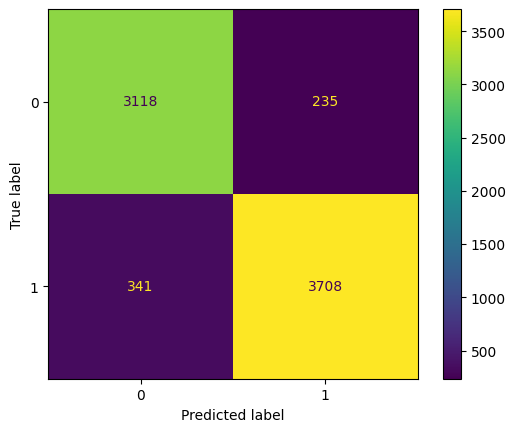

In [232]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test_handling)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_seq)

### 7.9.4. Model Saving

In [233]:
# Save ANN Model

model_functional.save('func_imp_tanh_adamax.h5')

# Kesimpulan

> Data yang dimiliki merupakan data pembeli churn dari sebuah online marketplace.

> Saya menggunakan 10 fitur yaitu age, avg_time_spent, avg_transaction_value, avg_frequency_login_days points_in_wallet, gender, membership_category, used_special_discount, offer_application_preference, feedback yang meurut saya paling memiliki korelasi. Pengecekan korelasi dengan menggunakan paerson.

> Missing value dilakukan imputasi dengan menggunakan SimpleImputer dengan menggunakan nilai mayoritas.

> Pada data numerical dilakukan scaling menggunakan StandartScaller dan pada data categorical diencode dengan menggunakan OrdinalEncoder. 

> Model yang digunakan merupakan baseline model dan improved model.

> Saya melakukan pipeline dengan detail sebagai berikut :

*   Pada Train saya menggunakan menggunakan batch 64 dimana setiap kali baych run data yang di run sebanyak 64 data atau seluruh data dibagi per 64 data dan dilakukan shuffel atau pengecakan dengan shuffle(128) dan setiap run diualang 3 kali menggunakan repeate(3).
*   Pada Test saya juga menggunakan batch 64 atau 64 data per run.
*   Pada Val saya juga menggunakan batch 64 atau 64 data per run.
*   Data di-prefetch menggunakan .prefetch(tf.data.AUTOTUNE)

> Secara keseluruhan setiap model akan menggunakan pipeline tersebut dalam training data.

> Pada setiap model saya menggunakan 3 hiiden layer dengan 8 hidden neuron. Pada Baseline model saya menggunakan fungsi aktivasi 'relu', optimizer 'adam' dan pada layer output menggunakan aktivasi 'sigmoid', loss dengan menggunakan 'binary_crossentropy' dikarenakan saya melakukan binary classification dan metric evaluasi yang digunakan accuracy karena saya melakukan binary classification dan data kelas target balance.

> Epoch yang digunakan setiap model menggunakan 50 epoch.

> Setiap model yang dibangun terdiri dari sequential API dan functional API.

> Pada Improved Model saya menerapkan improvisasi pada fungsi aktivasi dengan menggunakan softmax, tanh dan relu. selain itu setelah mendapat model dengan improved akurasi terbaik dan processing time paling cepat saya akan melakukan improvisasi pada optimizer. Selain itu pada Improved Model saya juga menerapkan BatchNormalization dan Droput.

> Pada Baseline tidak menggunakan BatchNormalization dan Dropout

> Baseline - Sequential API - activation relu, optimizer adam : accuracy = 0.93, time = 5 Menit 12 detik.

> Baseline - Functional API - activation relu, optimizer adam : accuracy = 0.92, time = 4 menit 24 detik.

> Pada Improved Sequential menggunakan BatchNormalization dan Dropout

> Improved - Sequential API - activation softmax, optimizer adam : accuracy = 0.92, time = 8 menit 29 detik dengan ukuran model 72kb.

> Improved - Sequential API - activation tanh, optimizer adam : accuracy = 0.92, time 6 menit 41 detik dengan ukuran model 72kb.

> Improved - Sequential API - activation relu, optimizer adam : accuracy = 0.92, time = 6 menit 44 detik dengan ukuran model 72kb.

> Improved - Sequential API - activation tanh, optimizer SGD : accuracy = 0.92, time = 6 menit 49 detik dengan ukuran model 56kb.

> Improved - Sequential API - activation tanh, optimizer adamax : accuracy = 0.92, time = 6 menit 22 detik dengan ukuran model 72kb.

> Improved - Functional API - activation softmax, optimizer adam : accuracy = 0.87, time = 3 menit 22 detik dengan ukuran model 45kb.

> Improved - Functional API - activation tanh, optimizer adam : accuracy = 0.93, time = 3 menit 22 detik dengan ukuran model 45kb.

> Improved - Functional API - activation tanh, optimizer SGD : accuracy = 0.88, time = 3 menit 22 detik dengan ukuran model 36kb.

> **Improved - Functional API - activation tanh, optimizer adamax : accuracy = 0.92, time = 3 menit 22 detik dengan ukuran model 45kb.**

> Dari model yang telah dibuat, Model Improved Functional API yang menggunakan fungsi aktivasi tanh dan optimizer adam merupakan model terbaik, dengan akurasi 0.93 atau 93% dan waktu training 3 menit 22 detik dan memiliki ukuran 45kb. Model ini akan digunakan dalam model inference.

> Model yang digunakan untuk inferensi yaitu Improved Functional API dengan fungsi aktuivasitanh dan optimizer adam memiliki kelabihan yaitu berdasarkan metric evaluasi menggunkana accuracy didapat akurasi yang tinggi meskipundibanding dengan model lain tidak terlalu signifikan. 

> Untuk improvement kedepan pada fase training dapat melakukan atau mengganti learning rate agar performansi model dapat terlihat jelas, selain itu juga mencoba menggunakan hidden layer lebih maupun melakukan modifikasi penambahan maupun pengurangan hidden neuron di tiap hidden layer. Selain Hal yang disebutkan diatas, improvisasi model kedepan dapat menggunakan epoch yang lebih besar agar performansi model lebih jelas terlihat apakah ada exploding gradient atau tidak yang nantinya juga akan mempengaruhi akurasi model yang dibuat.







